In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# K FOLD CROSS VALIDATION

# General Information

Stratified k-fold çapraz doğrulama, veri kümesini eğitim ve doğrulama alt kümelerine bölerek modelin performansını değerlendirmek için kullanılan bir yöntemdir. Stratified k-fold, sınıflar arasındaki dağılımı koruyarak veriyi bölerek her alt kümenin temsilini artırmaya çalışır. Bu, özellikle dengesiz sınıflara sahip veri setleriyle çalışırken önemlidir.

<span style="color:blue"> Stratified k-fold cross-validation is a method used to evaluate the performance of a model by dividing the dataset into training and validation subsets. Stratified k-fold attempts to increase the representation of each subset by splitting the data while preserving the distribution between classes. This is especially important when working with datasets with unbalanced classes.</span>

K-Fold Cross Validation, makine öğrenimi ve istatistiksel modelleme gibi veri analizi yöntemlerinde yaygın olarak kullanılan bir doğrulama tekniğidir. Temel amacı, bir modelin performansını değerlendirmek ve genelleme yeteneğini ölçmek için kullanılan veri setinin etkili bir şekilde kullanılmasını sağlamaktır.

Modelimizin performansını en iyi şekilde değerlendirebilmek için öncelikle veri setimizi test ve eğitim veri seti olarak belirli bir oranda ikiye ayırıyoruz. Bunu yapmamızdaki amaç, test setindeki datanın eğitim setindeki datayı görüp öğrenmemesidir.

<span style="color:blue"> K-Fold Cross Validation is a widely used validation technique in data analysis methods such as machine learning and statistical modeling. Its main purpose is to ensure that the dataset used to evaluate the performance of a model and measure its generalization ability is used effectively.</span>

<span style="color:blue"> In order to evaluate the performance of our model in the best way possible, we first divide our dataset into test and training datasets in a certain proportion. The purpose of this is to ensure that the data in the test set sees and learns the data in the training set.</span>

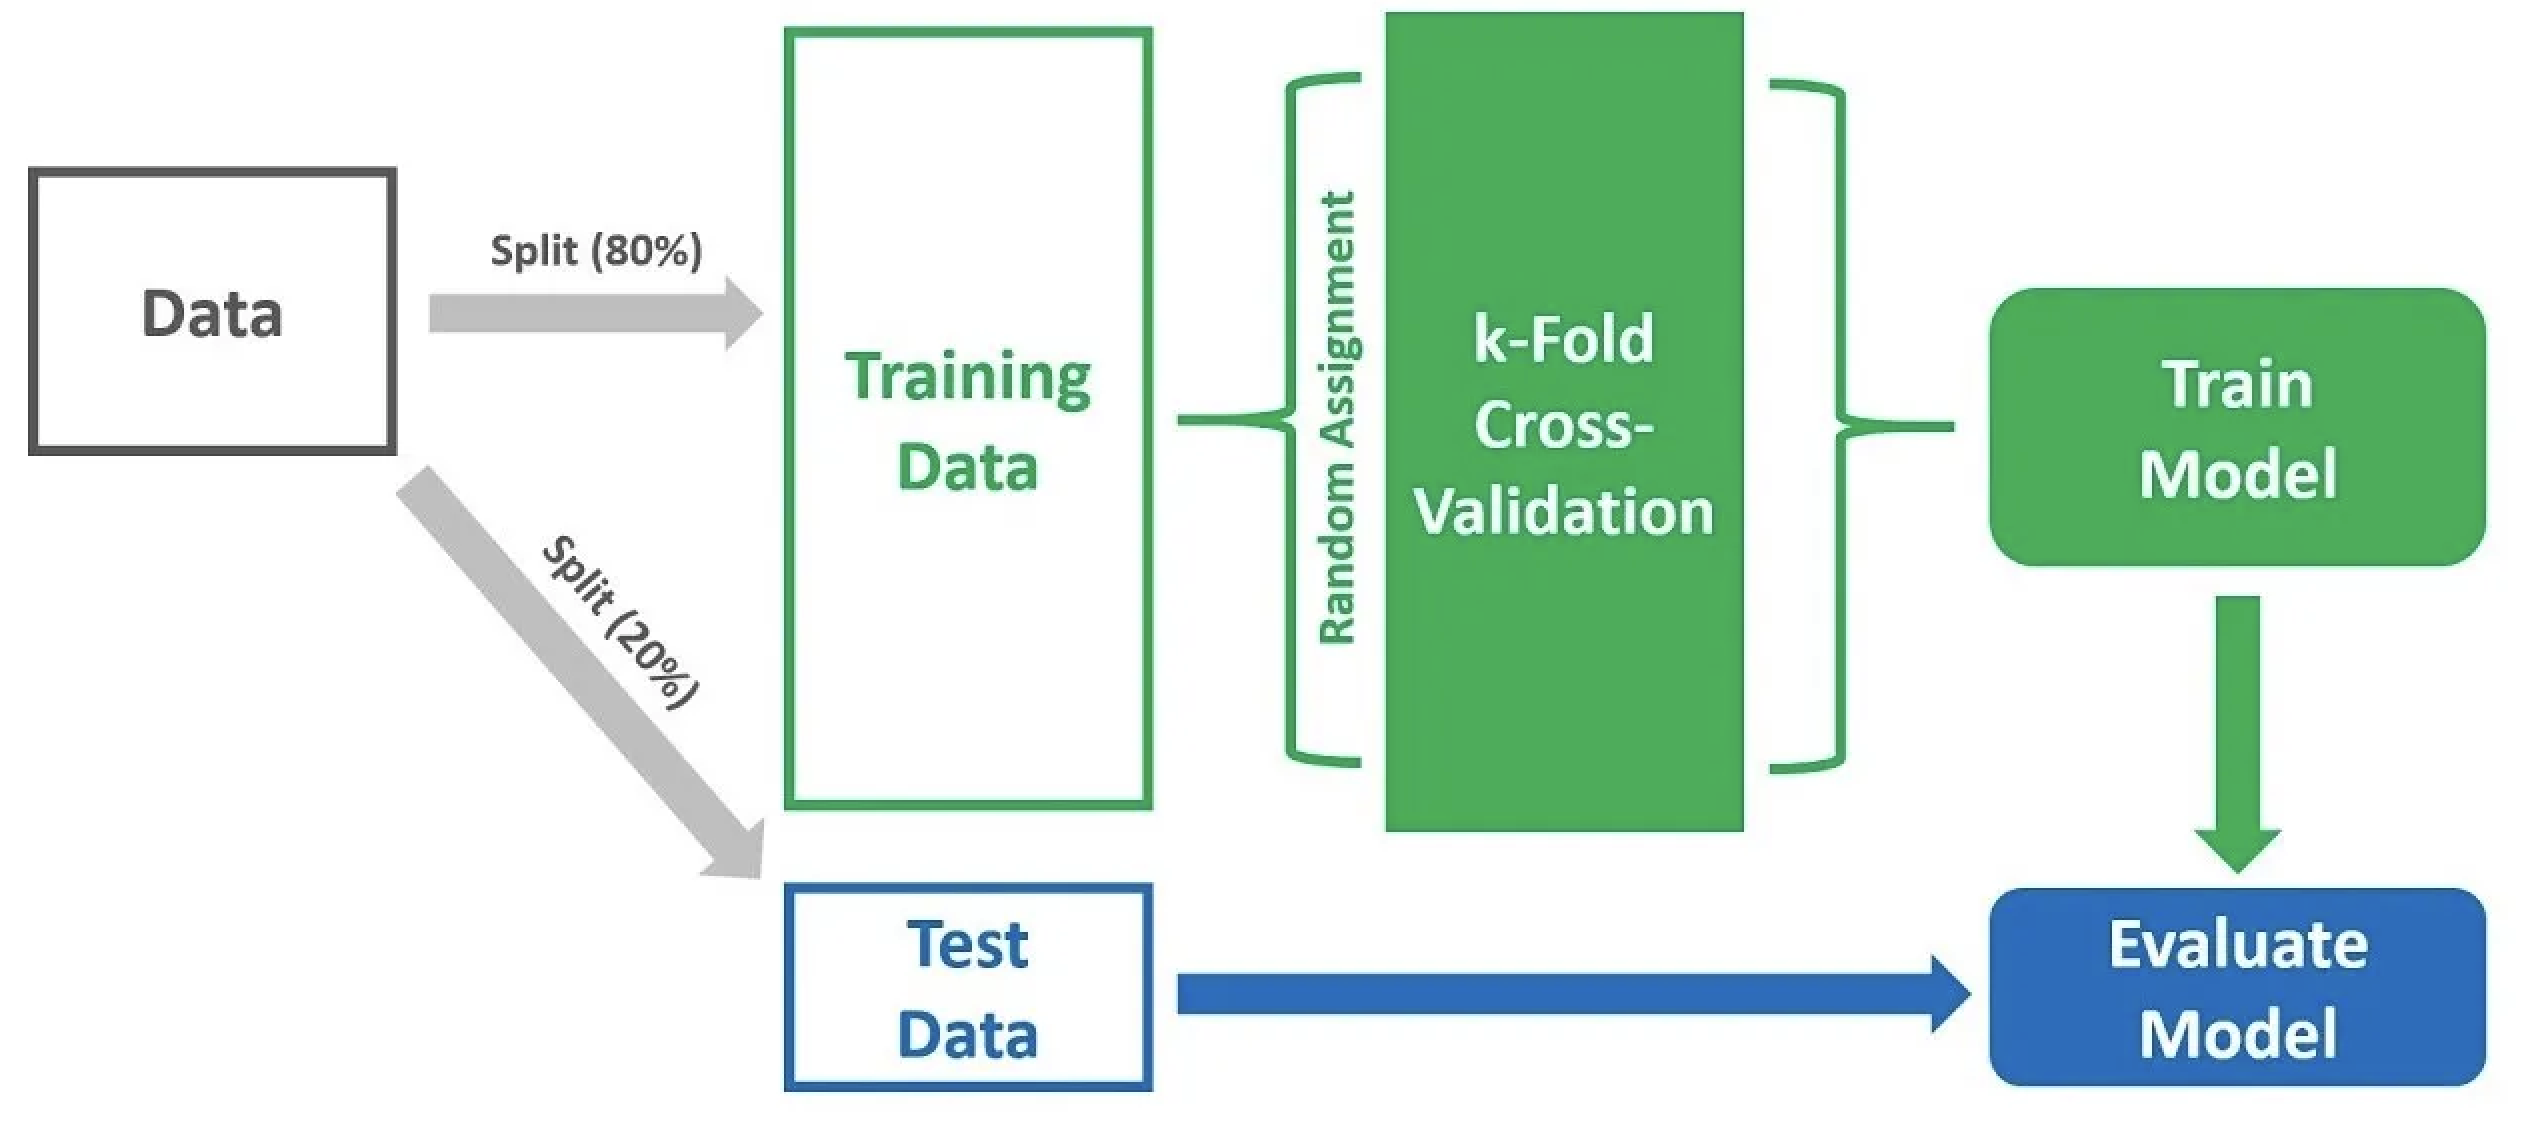

K-Fold Cross Validation, eğitim veri setini K adet eşit parçaya böler ve ardından bir parçayı validation yani kendi içerisinde doğrulama yapmak için kullanırken diğer parçaları eğitim veri seti olarak kullanır. Bu işlem K defa tekrarlanır, her seferinde farklı bir parça validation datası olarak seçilir. Sonuç olarak, K farklı doğruluk değerleri elde edilir ve bu değerlerin ortalaması alınarak modelin performansı değerlendirilir.

<span style="color:blue"> K-Fold Cross Validation divides the training dataset into K equal parts and then uses one part for validation and the other parts as the training dataset. This process is repeated K times, each time a different part is selected as validation data. As a result, K different accuracy values are obtained and the performance of the model is evaluated by averaging these values.</span>


K sayısı, doğruluk tahminlerinin güvenilirliğini artırmak için yeterli büyüklükte olmalıdır. Ancak aynı zamanda hesaplama ve zaman maliyetlerini de dikkate almak önemlidir. K için zayıf bir değer, modelin ölçülen yeteneğinin olduğundan fazla tahmin edilmesine (yüksek yanlılık) veya kullanılan eğitim verilerine bağlı olarak büyük ölçüde değişmesine (yüksek varyans) neden olabilir.

<span style="color:blue"> The number K should be large enough to increase the reliability of the accuracy estimates. But it is also important to consider computational and time costs. A poor value for K can lead to an overestimation of the measured ability of the model (high bias) or vary greatly depending on the training data used (high variance).</span>

Genellikle, K sayısı için yaygın olarak tercih edilen değerler 5 ve 10'dur. Ayrıca, veri setinin boyutu arttıkça K değerinin de artırılması önerilir. Örneğin, büyük veri setleri için 10 veya daha yüksek K değerleri tercih edilebilir.

<span style="color:blue">  Generally, the commonly preferred values for K are 5 and 10. It is also recommended to increase K as the size of the dataset increases. For example, for large data sets, K values of 10 or higher may be preferred.

* Veri seti, eğitim seti ve test seti olarak 2’ye ayrılır. (80/20 veya 70/30 gibi)
* Eğitim veri seti rastgele bir şekilde K eşit parçaya bölünür.
* Her bir parça sırayla validation verisi olarak kullanılırken, diğer parçalar eğitim veri seti olarak kullanılır.
* Model, her bir eğitim veri seti üzerinde eğitilir ve validation verisi ile performansı ölçülür.
* Bu işlem, K defa tekrarlanır, her seferinde farklı bir parça validation olarak seçilir.
* Sonuç olarak, K farklı doğruluk değerleri veya diğer performans metrikleri elde edilir.
* K doğruluk değerlerinin ortalaması veya performans metriklerinin ortalaması alınarak modelin genel performansı değerlendirilir.
* En son test veri seti ile modelimizin gerçek performansını ölçeriz.

- <span style="color:blue">The data set is divided into 2 parts as training set and test set (like 80/20 or 70/30 
- <span style="color:blue">The training dataset is randomly divided into K equal parts.
- <span style="color:blue">Each part is used as validation data in turn, while the other parts are used as training data set.
- <span style="color:blue">The model is trained on each training data set and its performance is measured with the validation data. 
- <span style="color:blue">This process is repeated K times, each time a different part is selected as validation.
- <span style="color:blue">As a result, K different accuracy values or other performance metrics are obtained.
- <span style="color:blue">By averaging the K accuracy values or performance metrics, the overall performance of the model is evaluated.
- <span style="color:blue">With the final test data set, we measure the actual performance of our model.

# Example 1 - Sample Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, n_classes=2, random_state=42)


Örnek veri seti oluşturuyoruz. Bu veri seti, iki sınıfa ait 1000 örnekten oluşuyor ve 20 özellik içeriyor.

<span style="color:blue">  We create a sample data set. This dataset consists of 1000 samples of two classes and contains 20 features.

In [ ]:
k_folds = 5
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)


* Stratified k-fold çapraz doğrulama için StratifiedKFold sınıfını kullandık. 
* n_splits parametresi, kaç katlı çapraz doğrulama yapılacağını belirler. 
* shuffle parametresi, verinin her kat için karıştırılıp karıştırılmayacağını belirler. 
* random_state parametresi ise her seferinde aynı bölünmenin üretilmesini sağlar

- <span style="color:blue">We used the StratifiedKFold class for stratified k-fold cross validation.
- <span style="color:blue">The n_splits parameter determines how many folds to cross validate.
- <span style="color:blue">The shuffle parameter determines whether the data is shuffled for each fold.
- <span style="color:blue">random_state parameter ensures that the same split is generated each time.

In [ ]:
model = LogisticRegression()
accuracy_scores = []

Bir logistic regresyon modeli oluşturuyoruz.

<span style="color:blue"> We create a logistic regression model.

In [ ]:
accuracy_scores = []

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


**Çapraz doğrulama işlemine başlıyoruz. for döngüsü içinde her bir kat için aşağıdaki işlemler gerçekleştiriliyor:**

* Veriyi eğitim ve doğrulama alt kümelerine bölüyoruz.
* Modeli eğitiyoruz.
* Modeli kullanarak doğrulama verisi üzerinde tahminler yapıyoruz.
* Tahminler ile gerçek etiketleri karşılaştırarak doğruluk (accuracy) değerini hesaplıyoruz.

<span style="color:blue">  **We start the cross-validation process. The following operations are performed for each fold in the for loop:**

- <span style="color:blue"> We split the data into training and validation subsets.
- <span style="color:blue"> We train the model.
- <span style="color:blue"> We make predictions on the validation data using the model.
- <span style="color:blue"> We calculate the accuracy value by comparing the predictions with the actual labels.

In [ ]:

print(f'Stratified k-fold çapraz doğrulama sonuçları ({k_folds} kat):')
for i, acc in enumerate(accuracy_scores, 1):
    print(f'Fold {i}: Accuracy = {acc:.4f}')


average_accuracy = np.mean(accuracy_scores)
print(f'\nAverage Accuracy: {average_accuracy:.4f}')


Son olarak her bir kat için hesaplanan doğruluk değerlerini ve ortalama doğruluk değerini gösteriyoruz.

<span style="color:blue"> Finally, we show the accuracy values calculated for each floor and the average accuracy value.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, n_classes=2, random_state=42)

model = LogisticRegression()

kfold = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

plt.figure(figsize=(8, 6))
plt.plot(cv_scores, marker='o', linestyle='-', color='b')
plt.title('K-Fold Cross Validation Results')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


# Example 2 - Iris Data Set

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()

iris veri setini yükledik. Bu veri seti, üç farklı çiçek türüne ait özellikleri içerir. Bu özellikleri kullanarak çiçek türünü tahmin edecek bir sınıflandırma modeli oluşturacağız.

<span style="color:blue"> We have loaded the iris dataset, which contains features of three different flower types. Using these features, we will build a classification model to predict the flower type.

In [ ]:
model = RandomForestClassifier(random_state=42)


Bir RandomForestClassifier modeli oluşturduk. Bu model, birçok karar ağacının birleştirilmiş halidir ve sınıflandırma problemlerinde yaygın olarak kullanılır.

<span style="color:blue"> We created a RandomForestClassifier model, which is a combination of several decision trees and is widely used in classification problems.

In [ ]:
k_folds = 3
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)


Stratified k-fold çapraz doğrulama için gerekli ayarları yaptık. StratifiedKFold sınıfını kullanarak veriyi katladık (fold) ve her bir kat için eğitim ve test setlerini oluşturduk.

<span style="color:blue"> We made the necessary settings for stratified k-fold cross validation. We folded the data using the StratifiedKFold class and created training and test sets for each fold.

In [ ]:
accuracy_scores = []
classification_reports = []

for train_index, test_index in stratified_kfold.split(data.data, data.target):
    X_train, X_test = data.data[train_index], data.data[test_index]
    y_train, y_test = data.target[train_index], data.target[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    accuracy_scores.append(accuracy)
    classification_reports.append(classification_rep)


Modelimizi eğitmek ve değerlendirmek için bir döngü oluşturduk. Her bir kat için aşağıdaki işlemleri gerçekleştirdik:

Veriyi eğitim ve test setlerine böldük.
Modeli eğittik.
Modeli test seti üzerinde değerlendirdik.
Elde edilen doğruluk (accuracy) ve sınıflandırma raporlarını kaydettik.

<span style="color:blue"> We created a loop to train and evaluate our model. For each floor, we performed the following operations:

<span style="color:blue"> Split the data into training and test sets. We trained the model. We evaluated the model on the test set. We recorded the obtained accuracy and classification reports.

In [ ]:
print(f'Stratified k-fold çapraz doğrulama sonuçları ({k_folds} kat):')
for i, (acc, class_rep) in enumerate(zip(accuracy_scores, classification_reports), 1):
    print(f'Fold {i}:')
    print(f'Accuracy = {acc:.4f}')
    print(f'Classification Report:\n{class_rep}\n')

average_accuracy = np.mean(accuracy_scores)
print(f'\nOrtalama Accuracy: {average_accuracy:.4f}')


Son olarak her bir kat için elde edilen doğruluk ve sınıflandırma raporlarını ekrana yazdırdık.

<span style="color:blue"> Finally, we printed the accuracy and classification reports for each floor on the screen.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X, y = iris.data, iris.target

model = LogisticRegression(max_iter=1000)


kfold = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

plt.figure(figsize=(8, 6))
plt.plot(cv_scores, marker='o', linestyle='-', color='b')
plt.title('K-Fold Cross Validation Results (Iris Dataset)')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


# Example 3 - Disease Dataset

In [ ]:
# to work with dataframes
import pandas as pd
import numpy as np

# to split data into train and test
from sklearn.model_selection import train_test_split

# to build logstic regression model
from sklearn.linear_model import LogisticRegression

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/kaggle/input/diabetes-cv/diabetes.csv')

df.head()

In [ ]:
# separating data into X and Y
X = df.drop(['class'], axis = 1)
Y = df['class']

In [ ]:
# creating train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify = Y)

In [ ]:
# defining kfold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

# number of splits = 10

* n_splits: Veri setinin kaç parçaya bölüneceğini belirler. Bu durumda, 10 parçaya bölünecek (10-fold çapraz doğrulama).
* random_state: Veri setini bölme işleminin rastgele olmasını kontrol eden bir parametredir. Aynı random_state değeri kullanıldığında, her çalıştırmada aynı bölünmeyi sağlar. Bu, çapraz doğrulama sonuçlarının tekrarlanabilir olmasını sağlar.
* shuffle: Veri setinin önceden karıştırılıp karıştırılmayacağını belirler. True olarak ayarlandığında, veri seti önce karıştırılır ve sonra K-fold çapraz doğrulama gerçekleştirilir. Bu, veri setindeki örneklerin rastgele sıralanmasını sağlar.

- <span style="color:blue">n_splits: Determines how many parts the dataset will be split into. In this case, it will be split into 10 parts (10-fold cross validation).</span>
- <span style="color:blue">random_state: A parameter that controls the randomness of splitting the dataset. Using the same random_state value ensures the same split on each run. This ensures that the cross validation results are repeatable.</span>
- <span style="color:blue">shuffle: Determines whether the data set should be pre-shuffled. When set to True, the data set is first shuffled and then K-fold cross-validation is performed. This ensures that the samples in the dataset are randomized.</span>

In [ ]:
# defining the model
model = LogisticRegression(random_state = 1)

# storing accuracy values of model for every fold in "results"
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

* İlk satır lojistik regresyon modelini LogisticRegression sınıfından oluşturuyor. random_state=1 parametresi, modelin oluşturulması sırasında rastgelelik içeren işlemlerin kontrol edilmesini sağlar. Aynı random_state değeri kullanıldığında, model her çalıştırıldığında aynı şekilde oluşturulur. Bu, sonuçların tekrarlanabilirliğini sağlar.
* İkinci satır, cross_val_score fonksiyonunu kullanarak K-fold çapraz doğrulama ile modelin performansını değerlendiriyor. Parametreler şu şekildedir:

 * model: Değerlendirilecek model.
 * X_train ve Y_train: Eğitim veri setinin bağımsız ve bağımlı değişkenleri.
 * cv=kfold: K-fold çapraz doğrulama nesnesi.
 * scoring='accuracy': Performans ölçütü olarak doğruluk (accuracy) seçilmiştir. Başka ölçütler de seçilebilir, örneğin 'precision', 'recall', 'f1', vb.

- <span style="color:blue">The first line builds the logistic regression model from the LogisticRegression class. The parameter random_state=1 ensures that randomness is controlled during model building. When the same random_state value is used, the model is generated in the same way each time it is run. This ensures repeatability of results.
- <span style="color:blue">The second line evaluates the performance of the model with K-fold cross validation using the cross_val_score function. The parameters are as follows:

 - <span style="color:blue">model: The model to be evaluated.
 - <span style="color:blue">X_train and Y_train: Independent and dependent variables of the training dataset.
 - <span style="color:blue">cv=kfold: K-fold cross validation object.
 - <span style="color:blue">scoring='accuracy': Accuracy is chosen as the performance metric. Other metrics can be chosen, e.g. 'precision', 'recall', 'f1', etc.

In [ ]:
# let's see the value of accuracy for every fold
print(results)

In [ ]:
# let's see the mean accuracy score
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

* Bu satır, results dizisinin ortalamasını (results.mean()) ve standart sapmasını (results.std()) alarak, bunları ekrana yazdırır. Bu değerler, çapraz doğrulama sırasında elde edilen doğruluk değerlerinin genel performansının bir özetini sağlar.

* Formatlama ifadesi % .3f%% kullanılarak, sayısal değerlerin üç ondalık basamağa kadar görüntülenmesi ve yüzde işareti ile birlikte yazdırılması sağlanır. Bu, çıktının daha okunabilir ve anlamlı olmasını sağlar.

- <span style="color:blue">This line calculates the mean (results.mean()) and standard deviation (results.std()) of the 'results' array and prints them to the screen. These values provide a summary of the overall performance of accuracy obtained during cross-validation.

- <span style="color:blue">The formatting expression % .3f%% is used to display numerical values with three decimal places and includes a percentage sign when printing. This ensures that the output is more readable and meaningful.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

model = LinearRegression()

kfold = KFold(n_splits=10, random_state=42, shuffle=True)

cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

plt.figure(figsize=(8, 6))
plt.plot(cv_scores, marker='o', linestyle='-', color='b')
plt.title('K-Fold Cross Validation Results (Diabetes Dataset)')
plt.xlabel('Fold Number')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.show()


- <span style="color:blue">Thank you!